# MNIST neural network - Hyperparameter Optimization using Tensorflow

## MNIST Dataset
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

Firstly, let's select TensorFlow version 2.x in colab

In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

TensorFlow 2.x selected.


'2.1.0'

In [0]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

Let's load MNIST dataset

In [0]:
from tensorflow.keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_val, y_val) = mnist.load_data()

X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

Let's visualize some numbers using matplotlib

Label: 6


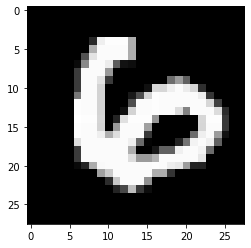

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[9000]))
plt.imshow(X_train[9000], cmap='gray')

### Print shape of the data

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Reshape features
- reshape() method gives a new shape to an array without changing its data
- You can read more about it here https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html

In [8]:
X_train = X_train.reshape(60000, 784)
print(X_train.shape)
X_val = X_val.reshape(10000, 784)
print(X_val.shape)

(60000, 784)
(10000, 784)




### Normalize features
- Normalize features from 0-255 to 0-1

In [9]:
print(X_train.max())
print(X_train.min())

X_train = X_train / 255.0
X_val = X_val / 255.0

print(X_train.max())
print(X_train.min())


255
0
1.0
0.0



### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert X_train and X_val
- number of classes: 10

In [10]:
print(y_train[10])
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tensorflow.keras.utils.to_categorical(y_val, num_classes=10)
print(y_train[10])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


### Let's see some other images and their labels

label for each of the below image: 5
label for each of the below image: 0
label for each of the below image: 4
label for each of the below image: 1
label for each of the below image: 9
label for each of the below image: 2
label for each of the below image: 1
label for each of the below image: 3
label for each of the below image: 1
label for each of the below image: 4


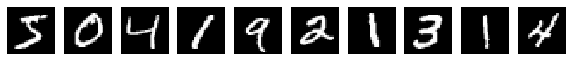

In [11]:
import numpy as np

# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(y_train[0:10][i])))
plt.show()


### Creating model 1
- Written in a function - to run it multiple times

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers, optimizers

def train_and_test_loop(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10
        
    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(784,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 1)

### Creating model 2
- Same model as above
- Instead of accuracy at each epoch below code gives the consolidate accuracy
- Notice: The model.evaluate line at the last is the only difference from model 1

In [0]:
def train_and_test_loop1(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10

    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(784,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 1)
    score = model.evaluate(X_train, y_train, verbose=0)
    
    return score

### Next steps 
- Double Check that the loss is reasonable
- Disable the regularization (Lambda = 0)

In [14]:
lr = 0.00001
Lambda = 0
train_and_test_loop(1, lr, Lambda)

Train on 60000 samples
60000/60000 [==============================] - 2s 39us/sample - loss: 2.3421 - accuracy: 0.1057


### Question
- Is the loss range correct? What about accuracy, does it make sense for an untrained network

### Answer
- Absolutely! There are 10 output classes and the model is correctly predicting 1 up on 10 times (1/10 = 0.1% approx) as it is untrained.

### Now, lets crank up the Lambda(Regularization)and check what it does to our loss function.

In [15]:
lr = 0.00001
Lambda = 1e3
train_and_test_loop(1, lr, Lambda)

Train on 60000 samples
60000/60000 [==============================] - 1s 8us/sample - loss: 2399.6299 - accuracy: 0.1093


loss went up. Good! (Another sanity check)

### Now, lets overfit to a small subset of our dataset, in this case 20 images, to ensure our model architecture is good

In [0]:
X_train_subset = X_train[0:20]

In [0]:
y_train_subset = y_train[0:20]

In [0]:
X_train = X_train_subset
y_train = y_train_subset

In [19]:
X_train.shape

(20, 784)

In [20]:
y_train.shape

(20, 10)

### Tip: Make sure that you can overfit very small portion of the training data
So, set a small learning rate and turn regularization off

In the code below:
- Take the first 20 examples from MNIST
- turn off regularization(reg=0.0)
- use simple vanilla 'sgd'

Lets try and run for 500 iterations as the data set is very small

In [22]:
lr = 0.001
Lambda = 0
train_and_test_loop(500, lr, Lambda)

Train on 20 samples
Epoch 1/500
20/20 [==============================] - 0s 10ms/sample - loss: 2.2658 - accuracy: 0.1500
Epoch 2/500
20/20 [==============================] - 0s 250us/sample - loss: 2.2629 - accuracy: 0.1500
Epoch 3/500
20/20 [==============================] - 0s 280us/sample - loss: 2.2574 - accuracy: 0.1500
Epoch 4/500
20/20 [==============================] - 0s 254us/sample - loss: 2.2495 - accuracy: 0.1500
Epoch 5/500
20/20 [==============================] - 0s 171us/sample - loss: 2.2397 - accuracy: 0.2000
Epoch 6/500
20/20 [==============================] - 0s 165us/sample - loss: 2.2280 - accuracy: 0.2000
Epoch 7/500
20/20 [==============================] - 0s 183us/sample - loss: 2.2148 - accuracy: 0.2000
Epoch 8/500
20/20 [==============================] - 0s 182us/sample - loss: 2.2002 - accuracy: 0.2500
Epoch 9/500
20/20 [==============================] - 0s 191us/sample - loss: 2.1846 - accuracy: 0.2500
Epoch 10/500
20/20 [==============================] - 

### Very small loss,  train accuracy going to 100, nice! We are successful in overfitting. The model architecture looks fine. Lets go for fine tuning it.

### Loading the original dataset again

### Import dataset
- This dataset can be imported
- High level API Keras has some datasets available
- mnist.load_data() returns two tuples (x_train, y_train), (x_test, y_test):
  - x_train, x_val: uint8 array of grayscale image data with shape (num_samples, 28, 28)
  - y_train, y_val: uint8 array of digit labels (integers in range 0-9) with shape (num_samples,).


In [0]:
(X_train, y_train), (X_val, y_val) = tensorflow.keras.datasets.mnist.load_data()

### Reshape features
- reshape() method gives a new shape to an array without changing its data
- You can read more about it here https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html

In [24]:
X_train = X_train.reshape(60000, 784)
print(X_train.shape)
X_val = X_val.reshape(10000, 784)
print(X_val.shape)

(60000, 784)
(10000, 784)


### Normalize features
- Normalize features from 0-255 to 0-1

In [0]:
X_train = X_train / 255.0
X_val = X_val / 255.0

### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert X_train and X_val
- number of classes: 10

In [0]:
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tensorflow.keras.utils.to_categorical(y_val, num_classes=10)

### Start with small regularization and find learning rate that makes the loss go down.

- we start with Lambda(small regularization) = 1e-7
- we start with a small learning rate = 1e-7

In [27]:
lr = 1e-7
Lambda = 1e-7
train_and_test_loop(20, lr, Lambda)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 11us/sample - loss: 2.3253 - accuracy: 0.1227
Epoch 2/20
60000/60000 [==============================] - 0s 5us/sample - loss: 2.3252 - accuracy: 0.1227
Epoch 3/20
60000/60000 [==============================] - 0s 5us/sample - loss: 2.3252 - accuracy: 0.1227
Epoch 4/20
60000/60000 [==============================] - 0s 5us/sample - loss: 2.3251 - accuracy: 0.1227
Epoch 5/20
60000/60000 [==============================] - 0s 5us/sample - loss: 2.3251 - accuracy: 0.1228
Epoch 6/20
60000/60000 [==============================] - 0s 5us/sample - loss: 2.3250 - accuracy: 0.1228
Epoch 7/20
60000/60000 [==============================] - 0s 5us/sample - loss: 2.3250 - accuracy: 0.1228
Epoch 8/20
60000/60000 [==============================] - 0s 5us/sample - loss: 2.3249 - accuracy: 0.1228
Epoch 9/20
60000/60000 [==============================] - 0s 5us/sample - loss: 2.3249 - accuracy: 0.1229
Epoch 10/20
60000/6000

### Loss barely changing. Learning rate is probably too low.

### Okay now lets try a (larger) learning rate 1e6. What could possibly go wrong?

- Learning rate lr = 1e8
- Regularization lambda = 1e-7


In [28]:
lr = 1e8
Lambda = 1e-7
train_and_test_loop(20, lr, Lambda)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 8us/sample - loss: nan - accuracy: 0.0990
Epoch 2/20
60000/60000 [==============================] - 0s 5us/sample - loss: nan - accuracy: 0.0987
Epoch 3/20
60000/60000 [==============================] - 0s 5us/sample - loss: nan - accuracy: 0.0987
Epoch 4/20
60000/60000 [==============================] - 0s 5us/sample - loss: nan - accuracy: 0.0987
Epoch 5/20
60000/60000 [==============================] - 0s 5us/sample - loss: nan - accuracy: 0.0987
Epoch 6/20
60000/60000 [==============================] - 0s 5us/sample - loss: nan - accuracy: 0.0987
Epoch 7/20
60000/60000 [==============================] - 0s 5us/sample - loss: nan - accuracy: 0.0987
Epoch 8/20
60000/60000 [==============================] - 0s 5us/sample - loss: nan - accuracy: 0.0987
Epoch 9/20
60000/60000 [==============================] - 0s 5us/sample - loss: nan - accuracy: 0.0987
Epoch 10/20
60000/60000 [=========================

### Loss exploding. Learning rate is too high. 
### Cost is very high. Always means high learning rate

### Lets try to train now with a value of learning rate between 1e-7 and 1e8

- learning rate = 1e4
- regularization remains the small, lambda = 1e-7

In [29]:
lr = 1e4
Lambda = 1e-7
train_and_test_loop(20, lr, Lambda)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 9us/sample - loss: nan - accuracy: 0.0981
Epoch 2/20
60000/60000 [==============================] - 0s 5us/sample - loss: nan - accuracy: 0.0987
Epoch 3/20
60000/60000 [==============================] - 0s 5us/sample - loss: nan - accuracy: 0.0987
Epoch 4/20
60000/60000 [==============================] - 0s 5us/sample - loss: nan - accuracy: 0.0987
Epoch 5/20
60000/60000 [==============================] - 0s 5us/sample - loss: nan - accuracy: 0.0987
Epoch 6/20
60000/60000 [==============================] - 0s 6us/sample - loss: nan - accuracy: 0.0987
Epoch 7/20
60000/60000 [==============================] - 0s 6us/sample - loss: nan - accuracy: 0.0987
Epoch 8/20
60000/60000 [==============================] - 0s 5us/sample - loss: nan - accuracy: 0.0987
Epoch 9/20
60000/60000 [==============================] - 0s 5us/sample - loss: nan - accuracy: 0.0987
Epoch 10/20
60000/60000 [=========================

### Still too high learning rate. Loss is not decreasing. The rough range of learning rate we should be cross validating is somewhere between [1e3 to 1e-7]

### Hyperparameter Optimization

### Cross validation Strategy


- Do coarse -> fine cross-validation in stages

- First stage: only a few epochs to get rough idea of what params work
- Second stage: longer running time, finer search
- … (repeat as necessary)

### Tip for detecting explosions in the solver: 
- If the cost is ever > 3 * original cost, break out early




### For example: Run coarse search for 10 times with different lr and Lambda values each with 100 epochs.


In [30]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-7.0, 3.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    best_acc = train_and_test_loop1(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 8us/sample - loss: 2.3019 - accuracy: 0.1187
Epoch 2/100
60000/60000 [==============================] - 0s 5us/sample - loss: 2.2860 - accuracy: 0.1272
Epoch 3/100
60000/60000 [==============================] - 0s 5us/sample - loss: 2.2702 - accuracy: 0.1384
Epoch 4/100
60000/60000 [==============================] - 0s 5us/sample - loss: 2.2549 - accuracy: 0.1515
Epoch 5/100
60000/60000 [==============================] - 0s 5us/sample - loss: 2.2400 - accuracy: 0.1674
Epoch 6/100
60000/60000 [==============================] - 0s 5us/sample - loss: 2.2254 - accuracy: 0.1858
Epoch 7/100
60000/60000 [==============================] - 0s 4us/sample - loss: 2.2111 - accuracy: 0.2053
Epoch 8/100
60000/60000 [==============================] - 0s 5us/sample - loss: 2.1970 - accuracy: 0.2275
Epoch 9/100
60000/60000 [==============================] - 0s 5us/sample - loss: 2.1831 - accuracy: 0.2511
Epoch 10/100
6

### As you can see from above, Case 2, 3 and 7 yields good accuracy. It is better to focus on those values for learning rate and Lambda

### Now run finer search

In [31]:
import math
for k in range(1,5):
    lr = math.pow(10, np.random.uniform(-4.0, -1.0))
    Lambda = math.pow(10, np.random.uniform(-4,-2))
    best_acc = train_and_test_loop1(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 9us/sample - loss: 1.9507 - accuracy: 0.5544
Epoch 2/100
60000/60000 [==============================] - 0s 5us/sample - loss: 0.9635 - accuracy: 0.8203
Epoch 3/100
60000/60000 [==============================] - 0s 5us/sample - loss: 0.7126 - accuracy: 0.8655
Epoch 4/100
60000/60000 [==============================] - 0s 5us/sample - loss: 0.6251 - accuracy: 0.8846
Epoch 5/100
60000/60000 [==============================] - 0s 5us/sample - loss: 0.5753 - accuracy: 0.8948
Epoch 6/100
60000/60000 [==============================] - 0s 5us/sample - loss: 0.5407 - accuracy: 0.9008
Epoch 7/100
60000/60000 [==============================] - 0s 5us/sample - loss: 0.5138 - accuracy: 0.9047
Epoch 8/100
60000/60000 [==============================] - 0s 5us/sample - loss: 0.4917 - accuracy: 0.9090
Epoch 9/100
60000/60000 [==============================] - 0s 5us/sample - loss: 0.4731 - accuracy: 0.9119
Epoch 10/100
6

![alt text](https://)### Running deep with lr=0.02 and Lambda=1e-4

In [32]:
lr = 2e-2
Lambda = 1e-4
train_and_test_loop1(100, lr, Lambda)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 9us/sample - loss: 1.0168 - accuracy: 0.7232
Epoch 2/100
60000/60000 [==============================] - 0s 6us/sample - loss: 0.3459 - accuracy: 0.9009
Epoch 3/100
60000/60000 [==============================] - 0s 5us/sample - loss: 0.2902 - accuracy: 0.9177
Epoch 4/100
60000/60000 [==============================] - 0s 5us/sample - loss: 0.2547 - accuracy: 0.9285
Epoch 5/100
60000/60000 [==============================] - 0s 5us/sample - loss: 0.2278 - accuracy: 0.9365
Epoch 6/100
60000/60000 [==============================] - 0s 5us/sample - loss: 0.2081 - accuracy: 0.9424
Epoch 7/100
60000/60000 [==============================] - 0s 5us/sample - loss: 0.1910 - accuracy: 0.9469
Epoch 8/100
60000/60000 [==============================] - 0s 5us/sample - loss: 0.1749 - accuracy: 0.9518
Epoch 9/100
60000/60000 [==============================] - 0s 5us/sample - loss: 0.1632 - accuracy: 0.9551
Epoch 10/100
6

[0.015263874088724455, 0.9995833]